In [ ]:
# Logistic regression is a supervised machine learning algorithm used for binary classification problems.
# It models the probability that an instance belongs to a particular class.
# The logistic function (sigmoid function) is commonly used to map the output to a probability between 0 and 1.
# Logistic regression assumes a linear decision boundary, which works well when the classes can be separated by a straight line or plane
# if the relationship between features and the target variable is non-linear, a linear model may not be sufficient
# To handle non-linear relationships, you can create new features by applying non-linear transformations to the original features.
# A common approach is to add powers of the original features. For instance, you can add quadratic or cubic terms to capture more complex patterns in the data.

In [ ]:
# Scikit-learn is a popular machine learning library in Python.
# It provides a LogisticRegression class that can be used to create logistic regression models easily.
# You'll likely use functions like fit for training the model and predict for making predictions.

In [ ]:
#Part-A

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load your dataset (replace 'data.csv' with your actual file path)
df = pd.read_csv('data.csv', header=None, names=['Feature1', 'Feature2', 'Label'])

# Assuming your dataset has a target column called 'Label' and features in other columns
X = df[['Feature1', 'Feature2']]  # Features
y = df['Label']  # Target variable

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test ready for training and testing your model


In [13]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


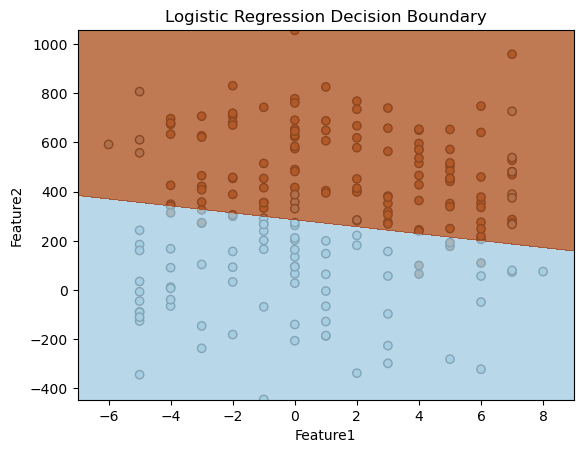

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')

# Plot decision boundary
plot_decision_boundary(logreg_model, X, y)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


In [15]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred_test = logreg_model.predict(X_test)

# Evaluate the model on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy on the testing data
print(f"Accuracy on Testing Data: {accuracy_test * 100:.2f}%")


Accuracy on Testing Data: 90.00%


In [16]:
#Part-B

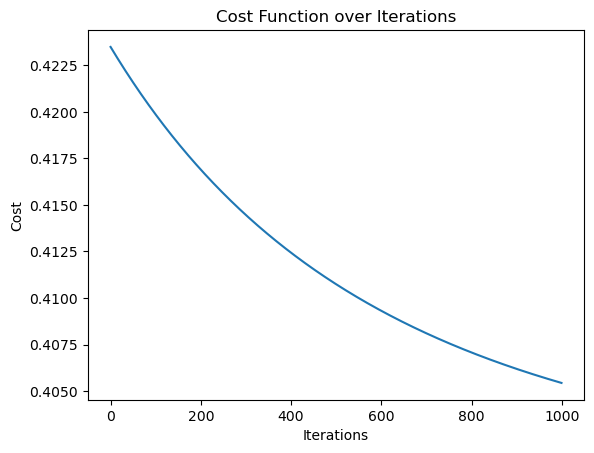

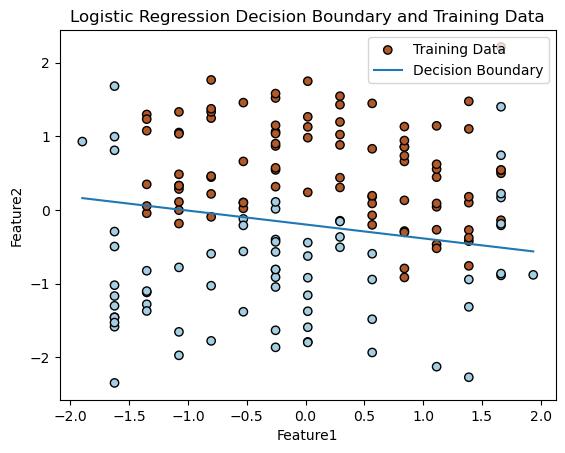

Accuracy on Testing Data: 92.50%


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to normalize features
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

# Add a column of ones for the bias term
def add_bias_term(X):
    return np.insert(X, 0, 1, axis=1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

def plot_decision_boundary(theta, X, y):
    x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')


# Load your dataset (replace 'data.csv' with your actual file path)

df = pd.read_csv('data.csv', header=None, names=['Feature1', 'Feature2', 'Label'])

# Assuming .
dataset has a target column called 'Label' and features in other columns
X = df[['Feature1', 'Feature2']].values  # Features
y = df['Label'].values  # Target variable

# Normalize features
X_normalized = normalize_features(X)

# Add bias term
X_bias = add_bias_term(X_normalized)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Initialize theta
theta_initial = np.zeros(X_train.shape[1])

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Train the logistic regression model using gradient descent
theta_final, costs = gradient_descent(X_train, y_train, theta_initial, alpha, iterations)

# Make predictions on the test data
y_pred_test = sigmoid(np.dot(X_test, theta_final))
y_pred_test = np.round(y_pred_test)
theta_final, costs = gradient_descent(X_train, y_train, theta_initial, alpha, iterations)

# Plot the cost over iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

# Plot the data points and decision boundary
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Training Data')
plot_decision_boundary(theta_final, X_train, y_train)
plt.title('Logistic Regression Decision Boundary and Training Data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Make predictions on the test data
X_test_normalized = normalize_features(X_test[:, 1:])  # Exclude the bias term
X_test_bias = add_bias_term(X_test_normalized)

y_pred_test = sigmoid(np.dot(X_test_bias, theta_final))
y_pred_test = np.round(y_pred_test)

# Evaluate the model on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Testing Data: {accuracy_test * 100:.2f}%")

In [18]:
#Part-C

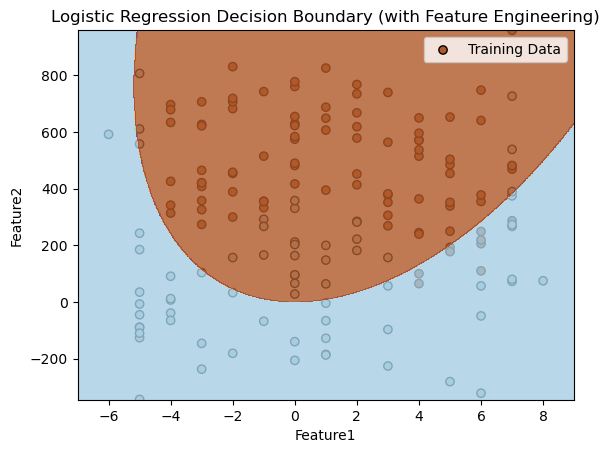

Accuracy on Testing Data (with Feature Engineering): 75.00%


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv', header=None, names=['Feature1', 'Feature2', 'Label'])

# Assuming your dataset has a target column called 'Label' and features in other columns
X_original = df[['Feature1', 'Feature2']]  # Original features
y_original = df['Label']  # Target variable

# Define the degree of polynomial features
degree = 2

# Use PolynomialFeatures to generate polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_enhanced = poly.fit_transform(X_original)

# Get the names of the original features
original_feature_names = X_original.columns

# Create names for the new polynomial features
poly_feature_names = [f"{original_feature_names[i]}^{j}" for i in range(len(original_feature_names)) for j in range(1, degree + 1)]

# Combine the original and polynomial feature names
all_feature_names = list(original_feature_names) + poly_feature_names

# Create a DataFrame with the enhanced features
df_enhanced = pd.DataFrame(X_enhanced, columns=all_feature_names[:-1])

# Concatenate the enhanced features with the original DataFrame
df_enhanced['Label'] = y_original

# Save the enhanced dataset to a new CSV file (optional)
df_enhanced.to_csv('enhanced_data.csv', index=False)

# Split the enhanced dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_enhanced, y_original, test_size=0.2, random_state=42)


# Create a logistic regression model2
logreg_model_poly = LogisticRegression()

# Train the model on the training data
logreg_model_poly.fit(X_train, y_train)

# Plot the data points and decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Training Data')
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg_model_poly.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.title('Logistic Regression Decision Boundary (with Feature Engineering)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Make predictions on the test data
y_pred_test_poly = logreg_model_poly.predict(X_test)

# Evaluate the model on the testing data
accuracy_test_poly = accuracy_score(y_test, y_pred_test_poly)
print(f"Accuracy on Testing Data (with Feature Engineering): {accuracy_test_poly * 100:.2f}%")


In [20]:
#Part-D

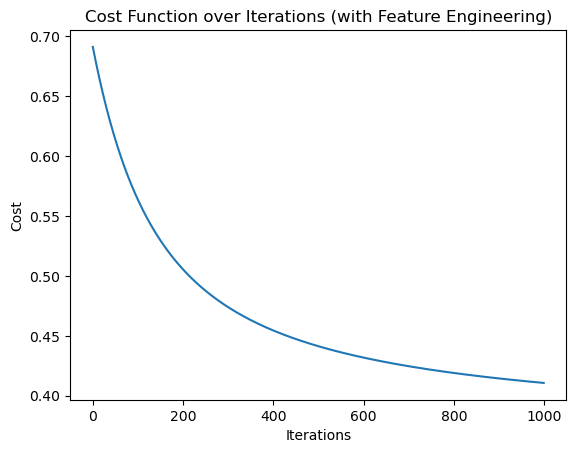

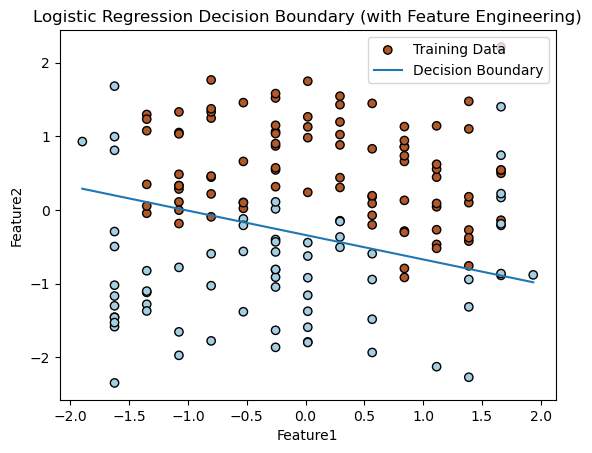

Accuracy on Testing Data (with Feature Engineering): 87.50%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to normalize features
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

# Add a column of ones for the bias term
def add_bias_term(X):
    return np.insert(X, 0, 1, axis=1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

# Function to plot decision boundary
def plot_decision_boundary(theta, X, y):
    x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')

# Load your enhanced dataset (replace 'enhanced_data.csv' with your actual file path)
enhanced_dataset_path = 'enhanced_data.csv'
df_enhanced = pd.read_csv(enhanced_dataset_path)

# Assuming your dataset has a target column called 'Label' and features in other columns
X_enhanced = df_enhanced.iloc[:, :-1].values
y_enhanced = df_enhanced['Label'].values

# Normalize features
X_enhanced_normalized = normalize_features(X_enhanced)

# Add bias term
X_enhanced_bias = add_bias_term(X_enhanced_normalized)

# Split the enhanced dataset into training and testing subsets
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced_bias, y_enhanced, test_size=0.2, random_state=42
)

# Initialize theta
theta_initial_enhanced = np.zeros(X_train_enhanced.shape[1])

# Set hyperparameters
alpha_enhanced = 0.01
iterations_enhanced = 1000

# Train the logistic regression model using gradient descent for the enhanced dataset
theta_final_enhanced, costs_enhanced = gradient_descent(
    X_train_enhanced, y_train_enhanced, theta_initial_enhanced, alpha_enhanced, iterations_enhanced
)

# Plot the cost over iterations for the enhanced dataset
plt.plot(costs_enhanced)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations (with Feature Engineering)')
plt.show()

# Plot the data points and decision boundary for the enhanced dataset
plt.scatter(X_train_enhanced[:, 1], X_train_enhanced[:, 2], c=y_train_enhanced, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Training Data')
plot_decision_boundary(theta_final_enhanced, X_train_enhanced, y_train_enhanced)
plt.title('Logistic Regression Decision Boundary (with Feature Engineering)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Make predictions on the enhanced test data
y_pred_test_enhanced = sigmoid(np.dot(X_test_enhanced, theta_final_enhanced))
y_pred_test_enhanced = np.round(y_pred_test_enhanced)

# Evaluate the model on the enhanced testing data
accuracy_test_enhanced = accuracy_score(y_test_enhanced, y_pred_test_enhanced)
print(f"Accuracy on Testing Data (with Feature Engineering): {accuracy_test_enhanced * 100:.2f}%")
